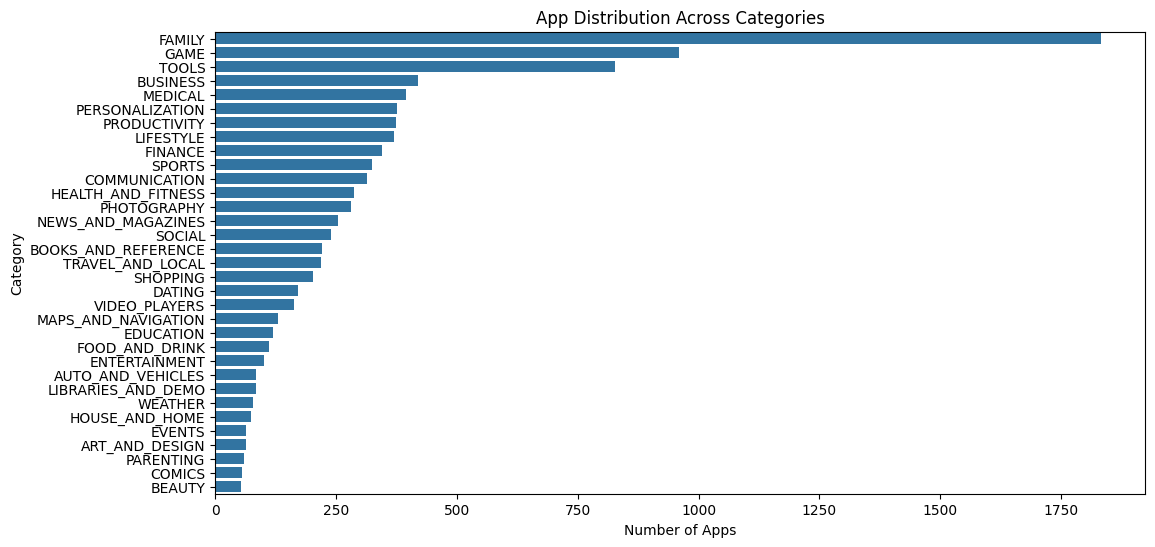

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the 'error_bad_lines=False' argument to skip problematic lines
df = pd.read_csv('apps.csv')

# Data Cleaning
# Convert 'Reviews' to numeric, handling errors
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Installs' to numeric, removing '+' and ','
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

# Convert 'Price' to numeric, removing '$'
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Clean 'Size' column, converting to MB
def clean_size(size):
  if isinstance(size, str): #Check if the value is a string
    if 'M' in size:
      return float(size.replace('M', ''))
    elif 'k' in size:
      return float(size.replace('k', '')) / 1000
  return None # Return None for non-string values

df['Size'] = df['Size'].apply(clean_size)

# Category Exploration
category_counts = df['Category'].value_counts()

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=category_counts.index)
plt.title('App Distribution Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your DataFrame 'df' ready

# Top Categories
top_categories = df['Category'].value_counts().head(10).index

for category in top_categories:
    subset = df[df['Category'] == category]
    print(f"Category: {category}")
    print(f"Average Rating: {subset['Rating'].mean()}")
    print(f"Average Price: {subset['Price'].mean()}")
    # ... (add more analysis for size, keywords, etc.)

# Niche Categories
niche_categories = df['Category'].value_counts().tail(5).index
# ... (perform similar analysis as above)

Category: FAMILY
Average Rating: 4.179664179104478
Average Price: 1.309967248908297
Category: GAME
Average Rating: 4.247368421052632
Average Price: 0.29646506777893633
Category: TOOLS
Average Rating: 4.039554317548746
Average Price: 0.3231559854897219
Category: BUSINESS
Average Rating: 4.098479087452472
Average Price: 0.4173571428571428
Category: MEDICAL
Average Rating: 4.166551724137932
Average Price: 2.5207594936708864
Category: PERSONALIZATION
Average Rating: 4.332214765100671
Average Price: 0.40021276595744687
Category: PRODUCTIVITY
Average Rating: 4.183388704318936
Average Price: 0.6709358288770054
Category: LIFESTYLE
Average Rating: 4.093355481727575
Average Price: 6.398021680216803
Category: FINANCE
Average Rating: 4.115562913907285
Average Price: 8.408202898550725
Category: SPORTS
Average Rating: 4.216153846153846
Average Price: 0.3076923076923077


Metrics Analysis:
Average Rating: 4.17
Average Size: nan MB
Most Popular App: Google Play Books (1000000000.0 installs)
Average Price: $1.10
Average Price of Paid Apps: $14.05


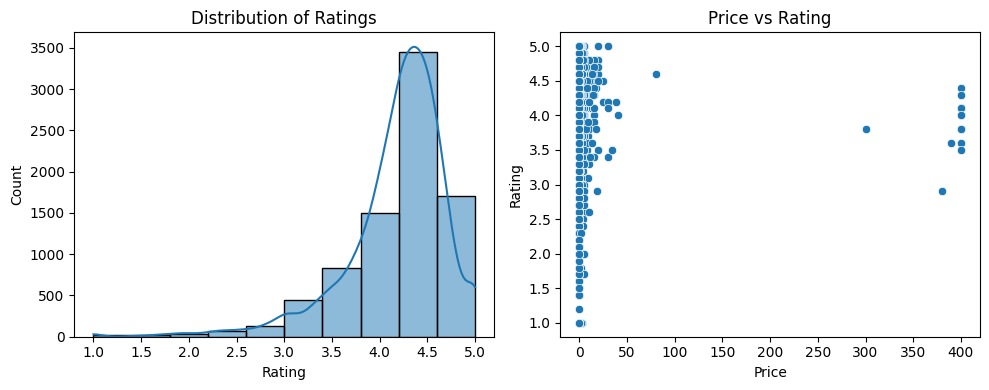

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the 'error_bad_lines=False' argument to skip problematic lines
df = pd.read_csv('apps.csv')

# Data Cleaning
# Convert 'Reviews' to numeric, handling errors
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Installs' to numeric, removing '+' and ','
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

# Convert 'Price' to numeric, removing '$'
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Clean 'Size' column, converting to MB
def clean_size(size):
  if isinstance(size, str): #Check if the value is a string
    if 'M' in size:
      return float(size.replace('M', ''))
    elif 'k' in size:
      return float(size.replace('k', '')) / 1000
  return None # Return None for non-string values

df['Size'] = df['Size'].apply(clean_size)

# --- Metrics Analysis ---
print("Metrics Analysis:")

# App Ratings
avg_rating = df['Rating'].mean()
print(f"Average Rating: {avg_rating:.2f}")

# App Size
avg_size = df['Size'].mean()
print(f"Average Size: {avg_size:.2f} MB")

# Popularity (Installs)
most_popular = df.loc[df['Installs'].idxmax()]
print(f"Most Popular App: {most_popular['App']} ({most_popular['Installs']} installs)")

# Pricing Trends
avg_price = df['Price'].mean()
print(f"Average Price: ${avg_price:.2f}")
paid_apps = df[df['Price'] > 0]
avg_paid_price = paid_apps['Price'].mean()
print(f"Average Price of Paid Apps: ${avg_paid_price:.2f}")

# Visualizations
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')

plt.tight_layout()
plt.show()

In [ ]:

!pip install nltk

In [ ]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataframe
df = pd.read_csv('apps.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment of a review
def analyze_sentiment(review):
    if isinstance(review, str):
        scores = analyzer.polarity_scores(review)
        if scores['compound'] >= 0.05:
            return 'Positive'
        elif scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'None'

# Apply sentiment analysis to 'Reviews' column
df['Sentiment'] = df['Reviews'].apply(analyze_sentiment)

# Print sentiment distribution
print(df['Sentiment'].value_counts())

Sentiment
None    9659
Name: count, dtype: int64


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Load the dataframe
df = pd.read_csv('apps.csv')

# Create an interactive scatter plot
fig = px.scatter(df, x='Rating', y='Reviews', color='Category',
                 hover_data=['App', 'Installs', 'Price'],
                 title='Interactive Scatter Plot of App Ratings vs Reviews')
fig.show()

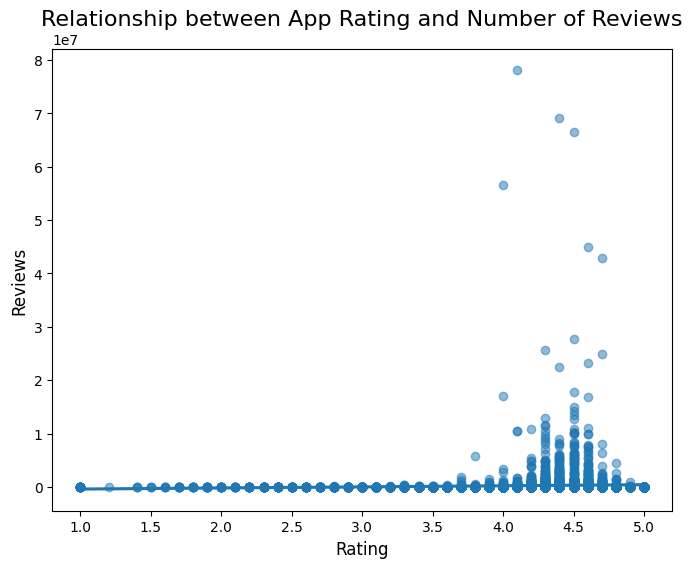

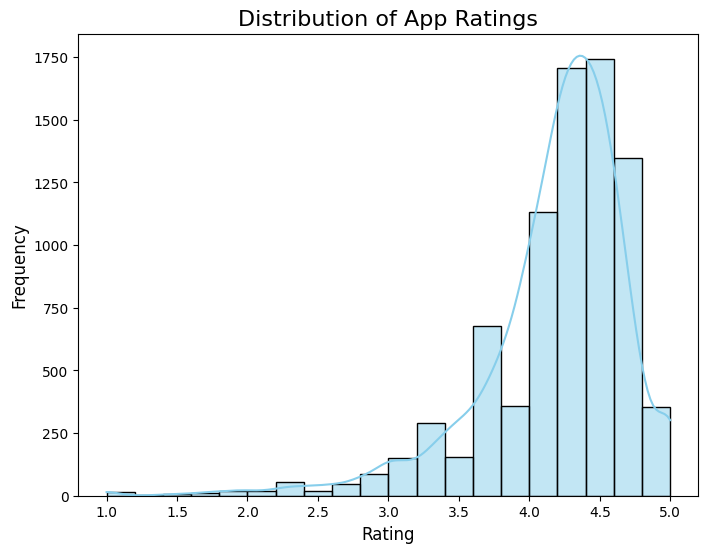

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Rating', y='Reviews', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between App Rating and Number of Reviews', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Reviews', fontsize=12)
plt.show()

# Distribution of ratings with adjusted bin size
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()